In [2]:
#imports
from matplotlib import image
from matplotlib import pyplot
import numpy as np

In [3]:
#load image
dog = image.imread('dog2.jpeg')

In [4]:
#print datatype and shape
print(dog.dtype)
#height, width, color (for this example)
print(dog.shape)

uint8
(825, 1100, 3)


In [5]:
#display image
def display_image(image, grayscale=False):
    if not grayscale:
        pyplot.imshow(image)
    else:
        pyplot.imshow(image, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

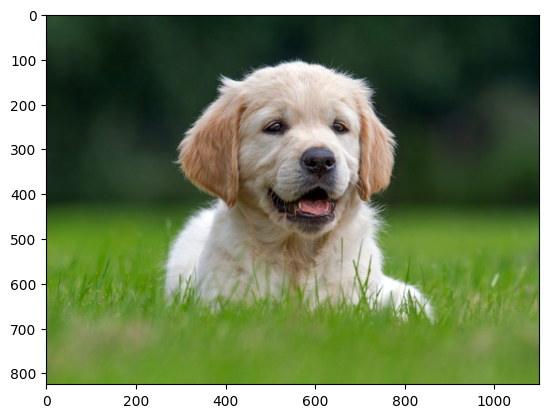

In [6]:
display_image(dog)

In [7]:
grayscale_dog = np.dot(dog[..., :3], [0.2126, 0.7152, 0.0722]).astype(np.uint8)
grayscale = True

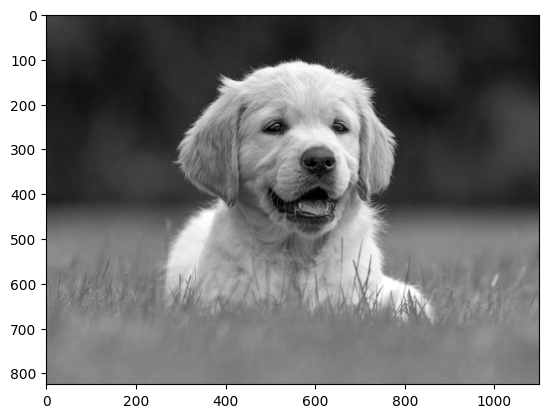

(825, 1100)


In [8]:
display_image(grayscale_dog, grayscale)
print(grayscale_dog.shape)

In [9]:
#function to invert the image by finding 255 - pixel value
def invert_image(image):
    image_i = 255 - image
    return image_i

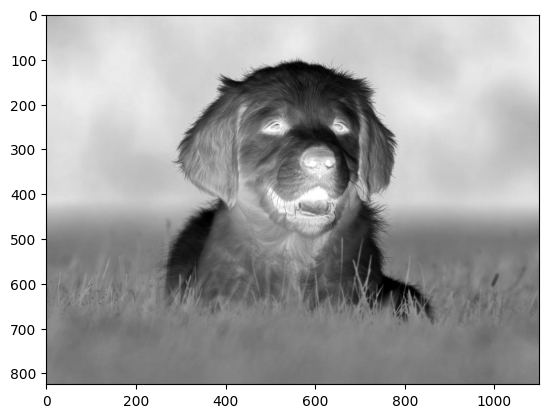

In [10]:
#invert and print out new image
dog_i = invert_image(grayscale_dog)
display_image(dog_i, grayscale)

In [11]:
#binary threshold - setting all pixel values above threshold to one value
def binary_threshold(image, threshold):
    b_image = np.where(image > threshold, 255, 0)
    return b_image

In [12]:
binary_dog = binary_threshold(grayscale_dog, 220)

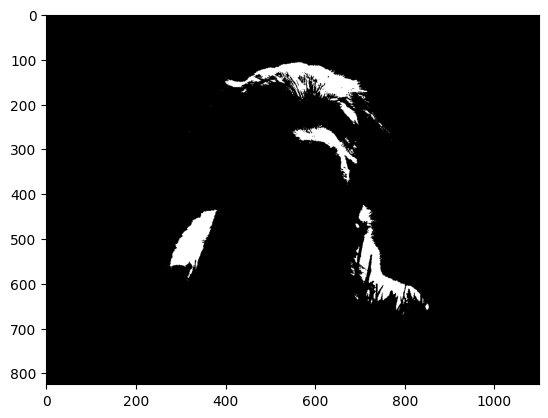

In [13]:
display_image(binary_dog, grayscale)

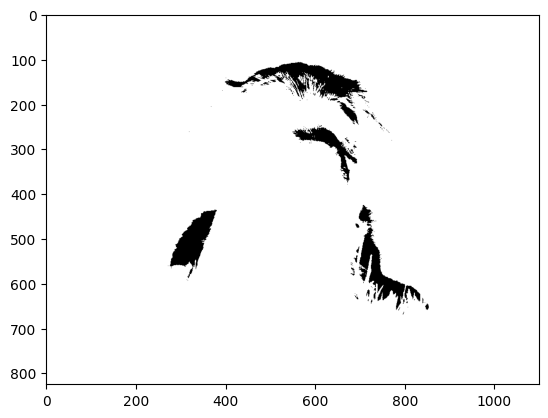

In [14]:
inverted_binary_dog = invert_image(binary_dog)
display_image(inverted_binary_dog, grayscale)

In [15]:
#functions to flip image
def flip_horizontal(image):
    return image[:,::-1]

def flip_vertical(image):
    return image[::-1,:]

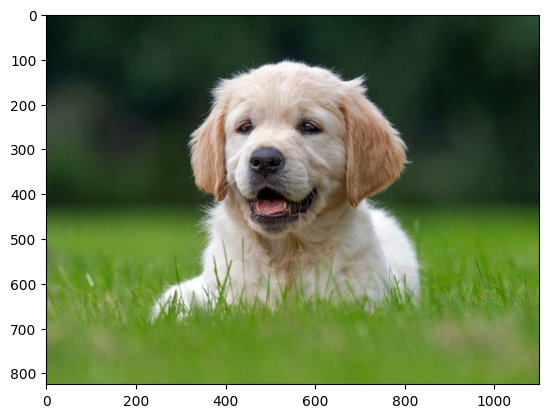

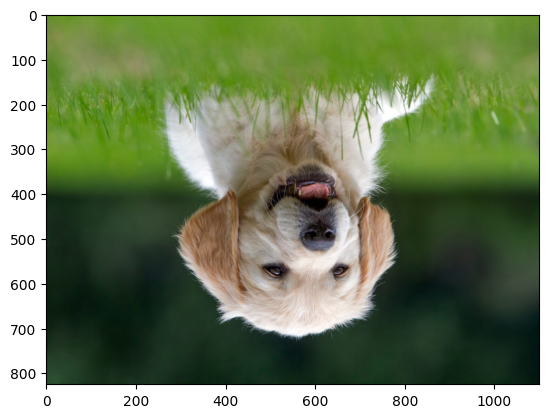

In [16]:
flip_h_dog = flip_horizontal(dog)
display_image(flip_h_dog)
flip_v_dog = flip_vertical(dog)
display_image(flip_v_dog)

In [17]:
# edge detection
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

In [18]:
def convolve(image, kernel):
    image_h, image_w, channels = image.shape
    kernel_h, kernel_w = kernel.shape

    pad_h = kernel_h // 2
    pad_w = kernel_w // 2

    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant', constant_values=0)

    output = np.zeros((image_h, image_w, channels))

    for c in range(channels):
        for i in range(image_h):
            for j in range(image_w):
                region = padded_image[i:i+kernel_h, j:j+kernel_w, c]
                output[i,j,c] = np.sum(region*kernel)

    output = np.clip(output, 0, 255).astype(np.uint8)
    return output

Data type: uint8
Min value: 0
Max value: 255


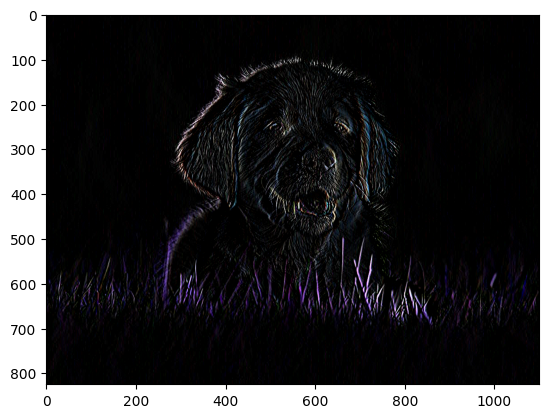

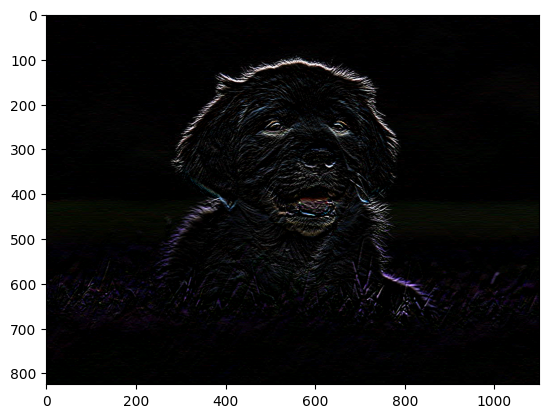

In [19]:
print("Data type:", dog.dtype)
print("Min value:", np.min(dog))
print("Max value:", np.max(dog))
edge_x_of_dog = convolve(dog, sobel_x)
edge_y_of_dog = convolve(dog, sobel_y)
display_image(edge_x_of_dog)
display_image(edge_y_of_dog)

In [28]:
downscaled_image = grayscale_dog[::25, ::25]

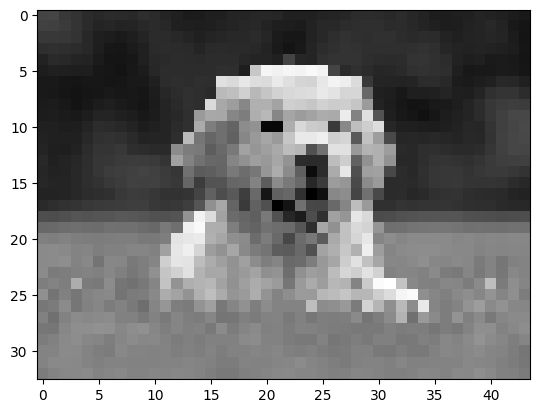

In [29]:
display_image(downscaled_image, grayscale)

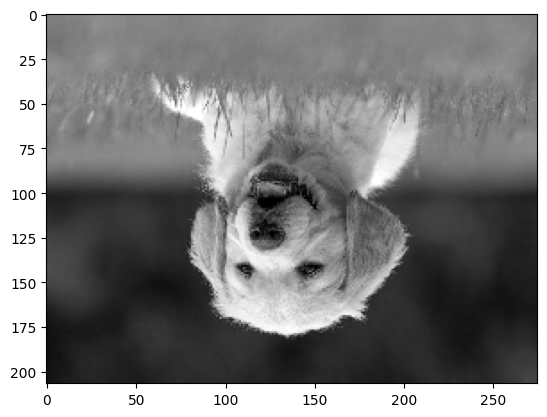

In [49]:
cropped_image = grayscale_dog[::-4, ::-4]
display_image(cropped_image, grayscale)